<a href="https://colab.research.google.com/github/yebiFesseha/Excel-for-Excel-In-MachineLearning/blob/main/StudentPerformance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This data is a fictious dataset used for Machine Learning.
Acknowledgment: http://roycekimmons.com/tools/generated_data/exams

This analysis will be the most exhustive and detailed analsyis I have done todate. I will create a number of vizaulisations from basics to advanced, rename columns, create new fields, filter by conditions and more. I will try to use functions extensively, use numpy, pandas and seaborn. Once I updated the data with new fields and prepared it for machine learning I wil be using a number of algorithms to generate a viable prediction. There are a number of categorical features in the data which require an encoding techinique and for the numerical data to be scaled in some fashion. Such as the "subject score" fields need to be preprocessed, in the words of the fantastic [3Blue1Brown](https://www.youtube.com/channel/UCYO_jab_esuFRV4b17AJtAw), to squeesh them within standard scale so that the prediction will not be unduly biased by any one of those features.
Once the analysis is completed I will be comparing the predictions, crown the top model and create an insight to help arrive at the right conclusion.

Tasks:
1. Analyse the distribution per planet per gender per subject comparison, countplot/ Violinplot per Grade
2. Prepare the data for ML, use , dummy variables, One hot Encoding and pre-processing: First create a new field/target for pass and Fail,
3. using scikit modells predict and compare predicted values against the True values.


In [ ]:
import pandas as pd
import numpy as np
import os

In [ ]:
os.chdir('sample_data')

In [ ]:
grade = pd.read_csv('StudentsPerformance.csv', header=0, sep=",")

In [ ]:
grade.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
grade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


# EDA

In [ ]:
print(f"The data has {grade.shape[0]} rows by {grade.shape[1]} columns")

The data has 1000 rows by 8 columns


In [ ]:
# Finding Null values if there is
print(f"The number of Null values are: {[g for g in grade.isna().sum().values if g>0]}")

The number of Null values are: []


In [ ]:
for col in grade.columns:
  print(f"For column \"{col}\" there are {grade[col].nunique()} unique values:{grade[col].unique()}\n")

For column "gender" there are 2 unique values:['female' 'male']

For column "race/ethnicity" there are 5 unique values:['group B' 'group C' 'group A' 'group D' 'group E']

For column "parental level of education" there are 6 unique values:["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

For column "lunch" there are 2 unique values:['standard' 'free/reduced']

For column "test preparation course" there are 2 unique values:['none' 'completed']

For column "math score" there are 81 unique values:[ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32  93  19  23   8]

For column "reading score" there are 72 unique values:[ 72  90  95  57  78  83  43  64  60  54  52  81  53  7

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use('fivethirtyeight')
import bokeh

In [ ]:
# Renaming columns names
grade.rename(columns={'race/ethnicity':'ethnicity',
                      'parental level of education': 'parental_Education',
                      'test preparation course':'test_Preparation'}, inplace=True)

In [ ]:
# updating Ethnicity groups use replace or map
grade['ethnicity'] = grade['ethnicity'].replace({'group A': 'mars', 'group B': 'venus',
                        'group C': 'jupiter', 'group D': 'saturn',
                        'group E': 'earth'})

In [ ]:
round(grade.groupby(grade.columns[1]).agg(['count','min', 'max','sum','mean', 'median']),2)

math score                         ... writing score                          
               count min  max    sum   mean  ...           min  max    sum   mean median
ethnicity                                    ...                                        
earth            140  30  100  10335  73.82  ...            22  100   9997  71.41     72
jupiter          319   0   98  20564  64.46  ...            10  100  21637  67.83     68
mars              89  28  100   5485  61.63  ...            19   97   5578  62.67     62
saturn           262  26  100  17649  67.36  ...            32  100  18378  70.15     72
venus            190   8   97  12056  63.45  ...            15   96  12464  65.60     67

[5 rows x 18 columns]

In [ ]:
round(grade.groupby(grade.columns[1]).describe(),2)

math score                      ... writing score                    
               count   mean    std   min  ...           25%   50%    75%    max
ethnicity                                 ...                                  
earth          140.0  73.82  15.53  30.0  ...         62.00  72.0  80.25  100.0
jupiter        319.0  64.46  14.85   0.0  ...         57.00  68.0  79.00  100.0
mars            89.0  61.63  14.52  28.0  ...         51.00  62.0  73.00   97.0
saturn         262.0  67.36  13.77  26.0  ...         61.00  72.0  80.00  100.0
venus          190.0  63.45  15.47   8.0  ...         55.25  67.0  78.00   96.0

[5 rows x 24 columns]

In [ ]:
round(grade.groupby(grade.columns[0]).describe(),2)

math score                            ... writing score                          
            count   mean    std   min   25%  ...           min   25%   50%    75%    max
gender                                       ...                                        
female      518.0  63.63  15.49   0.0  54.0  ...          10.0  64.0  74.0  82.00  100.0
male        482.0  68.73  14.36  27.0  59.0  ...          15.0  53.0  64.0  73.75  100.0

[2 rows x 24 columns]

In [ ]:
round(grade.groupby('gender').agg(['count','min', 'max','sum','mean', 'median']),2)

math score                         ... writing score                          
            count min  max    sum   mean  ...           min  max    sum   mean median
gender                                    ...                                        
female        518   0  100  32962  63.63  ...            10  100  37538  72.47     74
male          482  27  100  33127  68.73  ...            15  100  30516  63.31     64

[2 rows x 18 columns]

### Scores Per Group Analsys

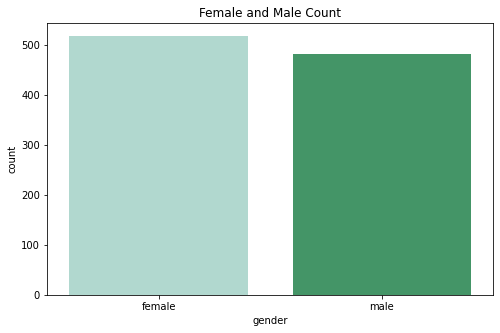

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x=grade['gender'], palette='BuGn')
plt.title('Female and Male Count')

plt.show()

In [ ]:
grade.head()

,gender,ethnicity,parental_Education,lunch,test_Preparation,math score,reading score,writing score
0,female,venus,bachelor's degree,standard,none,72,72,74
1,female,jupiter,some college,standard,completed,69,90,88
2,female,venus,master's degree,standard,none,90,95,93
3,male,mars,associate's degree,free/reduced,none,47,57,44
4,male,jupiter,some college,standard,none,76,78,75


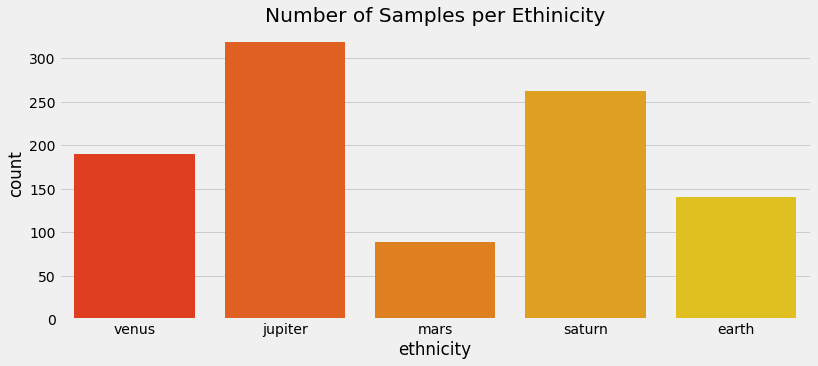

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(x=grade['ethnicity'], palette='autumn')
plt.title("Number of Samples per Ethinicity")
plt.show()

##### Grade Mapping using pd.cut

In [ ]:
labels = ['F', 'D', 'C', 'B', 'A']
bins = [0, 60, 70, 80, 90, 100]
grade['math_Grade'] = pd.cut(grade['math score'], labels=labels, bins=bins)
grade['reading_Grade'] = pd.cut(grade['reading score'], labels=labels, bins=bins)
grade['writing_Grade'] = pd.cut(grade['writing score'], labels=labels, bins=bins)
grade[(grade.loc[:, 'math score']>=60) & (grade.loc[:, 'math score']<70)]

,gender,ethnicity,parental_Education,lunch,test_Preparation,math score,reading score,writing score,math_Grade,reading_Grade,writing_Grade
1,female,jupiter,some college,standard,completed,69,90,88,D,B,B
8,male,saturn,high school,free/reduced,completed,64,64,67,D,D,D
12,female,venus,high school,standard,none,65,81,73,D,B,C
15,female,jupiter,some high school,standard,none,69,75,78,D,C,C
20,male,saturn,high school,standard,none,66,69,63,D,D,D
...,...,...,...,...,...,...,...,...,...,...,...
991,female,venus,some high school,standard,completed,65,82,78,D,B,C
993,female,saturn,bachelor's degree,free/reduced,none,62,72,74,D,C,C
994,male,mars,high school,standard,none,63,63,62,D,D,D
996,male,jupiter,high school,free/reduced,none,62,55,55,D,F,F


In [ ]:
#check for null values
grade.loc[(grade.isnull().sum(axis=1)>0)]

,gender,ethnicity,parental_Education,lunch,test_Preparation,math score,reading score,writing score,math_Grade,reading_Grade,writing_Grade
59,female,jupiter,some high school,free/reduced,none,0,17,10,NaN,F,F


In [ ]:
#check for null values second method
[val for val in grade.isnull().sum().values if val >0]

[1]

In [ ]:
# grade['math_Grade'].replace(np.NAN,'F', inplace=True) =====> didnt work
# grade['math_Grade'].astype('string').fillna('F', inplace=True)====> didnt work
grade.loc[59, 'math_Grade'] = 'F'

In [ ]:
# Verifying the value has been replaced
grade.iloc[59, :]

gender                          female
ethnicity                      jupiter
parental_Education    some high school
lunch                     free/reduced
test_Preparation                  none
math score                           0
reading score                       17
writing score                       10
math_Grade                           F
reading_Grade                        F
writing_Grade                        F
Name: 59, dtype: object

##### Get a distribution of score per subject, then per gender, then per planet

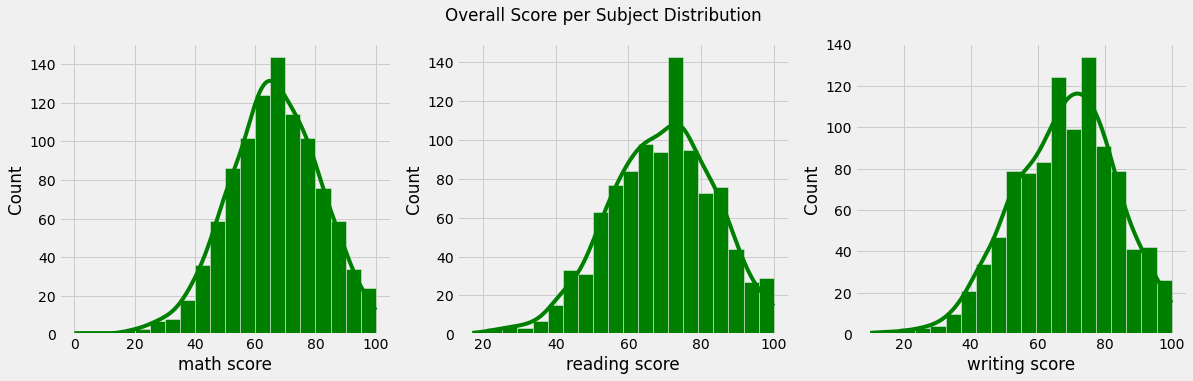

In [ ]:
chart, axs = plt.subplots(1,3, figsize=(18,5) )
i=0
for score in ['math score', 'reading score', 'writing score']:
  sns.histplot(grade[score], kde=True, bins=20, color='green', alpha=1, ax=axs[i])
  i+=1
plt.suptitle('Overall Score per Subject Distribution')
plt.show()

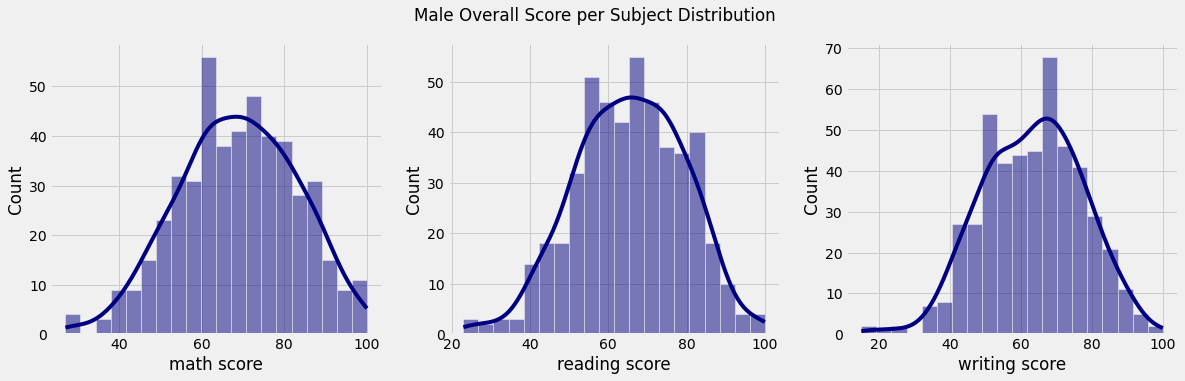

In [ ]:
chart, axs = plt.subplots(1,3, figsize=(18,5))
i=0
for score in ['math score', 'reading score', 'writing score']:
  sns.histplot(grade.loc[grade['gender']=='male',:][score], kde=True, bins=20, color='navy', alpha=0.5, ax=axs[i])
  i+=1
plt.suptitle('Male Overall Score per Subject Distribution')
plt.show()

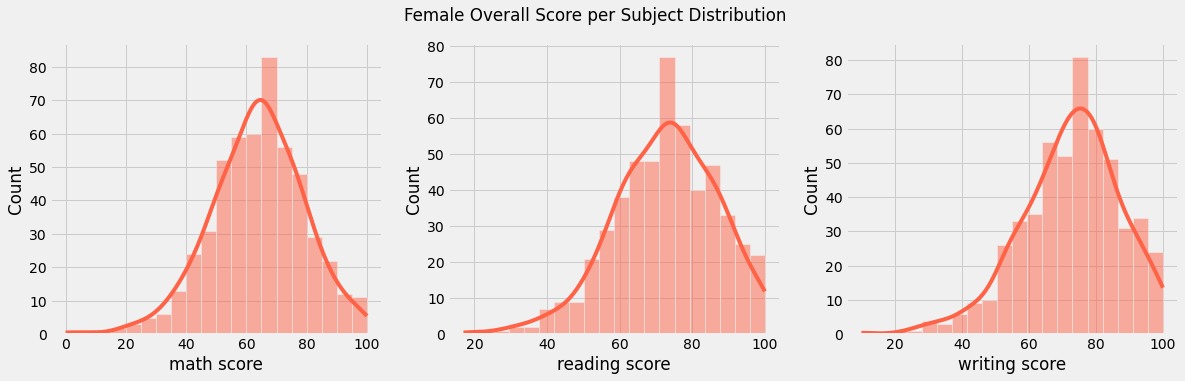

In [ ]:
chart, axs = plt.subplots(1,3, figsize=(18,5))
i=0
for score in ['math score', 'reading score', 'writing score']:
  sns.histplot(grade.loc[grade['gender']=='female',:][score], kde=True, bins=20, color='tomato', ax=axs[i])
  i+=1
plt.suptitle('Female Overall Score per Subject Distribution')
plt.show()

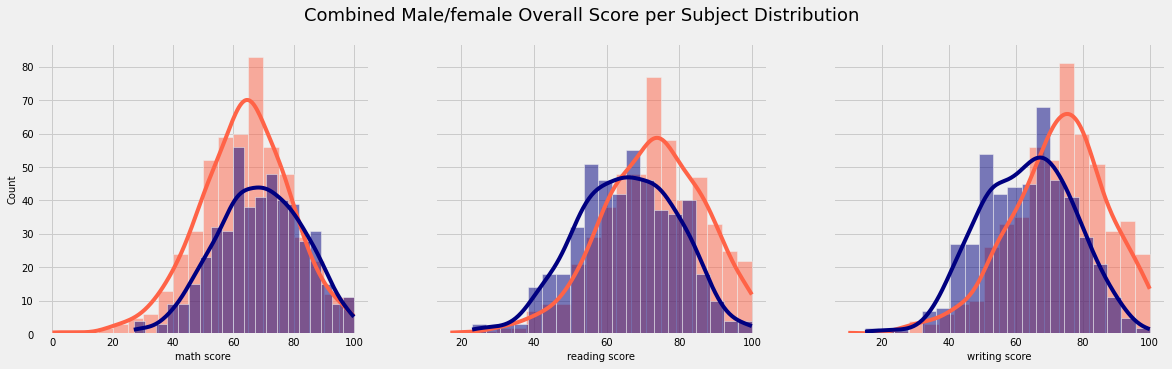

In [ ]:
chart, axs = plt.subplots(1,3, figsize=(18,5), sharey=True)
i=0
for score in ['math score', 'reading score', 'writing score']:
  sns.histplot(grade.loc[grade['gender']=='female',:][score], 
               kde=True, bins=20, color='tomato', alpha=0.5, ax=axs[i])
  sns.histplot(grade.loc[grade['gender']=='male',:][score], 
               kde=True, bins=20, color='navy', alpha=0.5, ax=axs[i])
  i+=1
plt.suptitle('Combined Male/female Overall Score per Subject Distribution', fontsize=18)
plt.show()

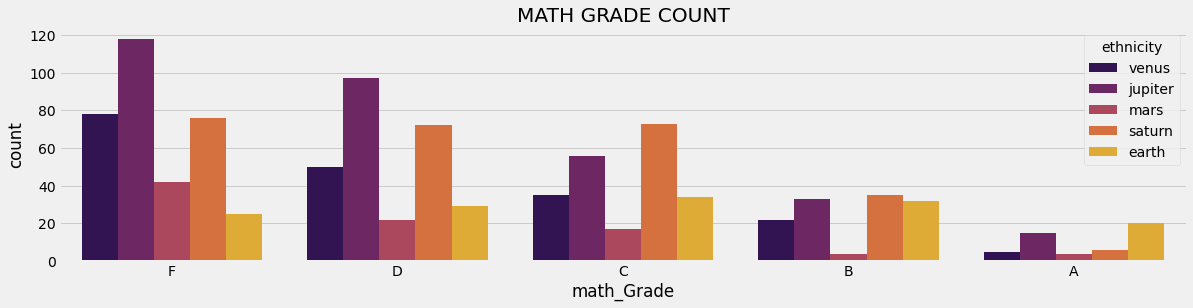

In [ ]:
plt.figure(figsize=(18,4))
sns.countplot(x='math_Grade', hue='ethnicity', data=grade, palette='inferno')
plt.title('MATH GRADE COUNT')
plt.show()

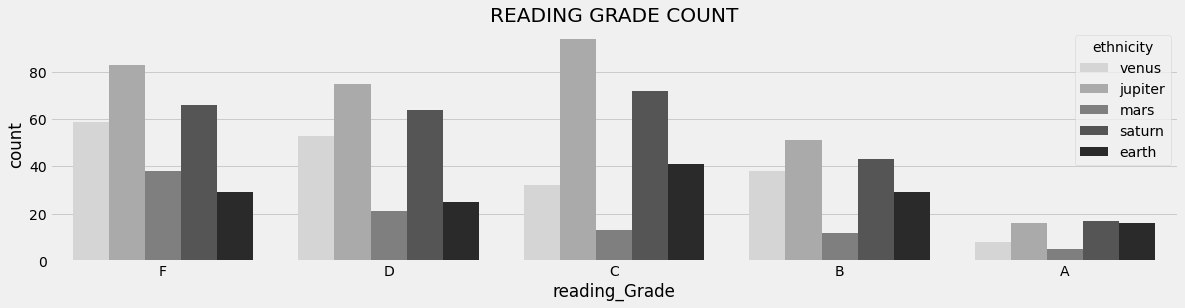

In [ ]:
# Reading GRADE Count
plt.figure(figsize=(18,4))
sns.countplot(x='reading_Grade', hue='ethnicity', data=grade, palette='gist_yarg')
plt.title('READING GRADE COUNT')
plt.show()

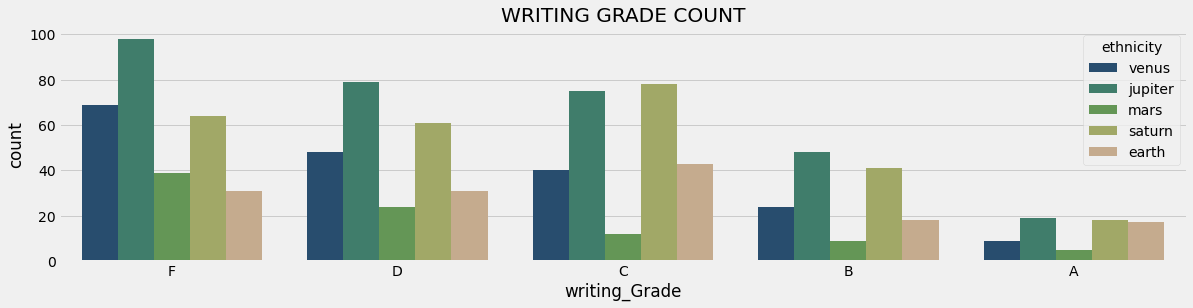

In [ ]:
plt.figure(figsize=(18,4))
sns.countplot(x='writing_Grade', hue='ethnicity', data=grade, palette='gist_earth')
plt.title('WRITING GRADE COUNT')
plt.show()

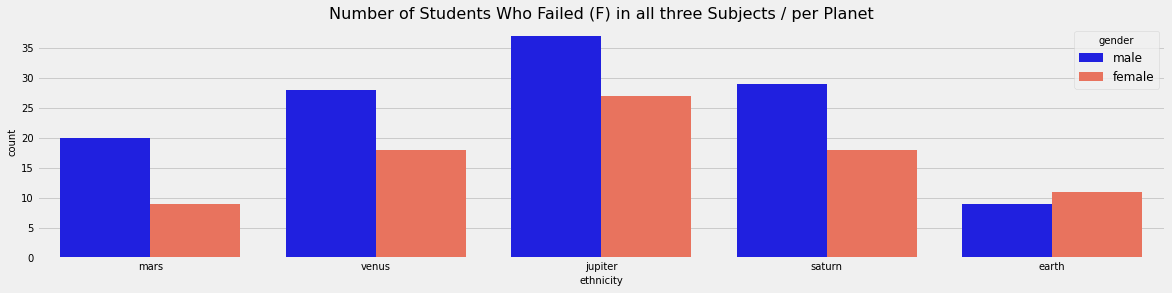

In [ ]:
plt.figure(figsize=(18,4))
sns.countplot(x='ethnicity',
              hue='gender', 
              data=grade.loc[(grade['math_Grade']=='F')&(grade['reading_Grade']=='F')&(grade['writing_Grade']=='F')], palette=['blue', 'tomato'])
plt.title('Number of Students Who Failed (F) in all three Subjects / per Planet', fontsize=16)
plt.show()

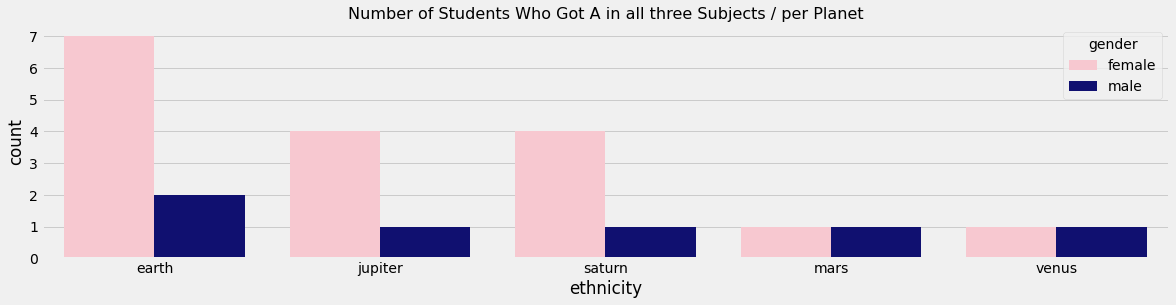

In [ ]:
plt.figure(figsize=(18,4))
sns.countplot(x='ethnicity',
              hue='gender', 
              data=grade.loc[(grade['math_Grade']=='A')&(grade['reading_Grade']=='A')&(grade['writing_Grade']=='A')], palette=['pink', 'navy'])
plt.title('Number of Students Who Got A in all three Subjects / per Planet', fontsize=16)
plt.show()

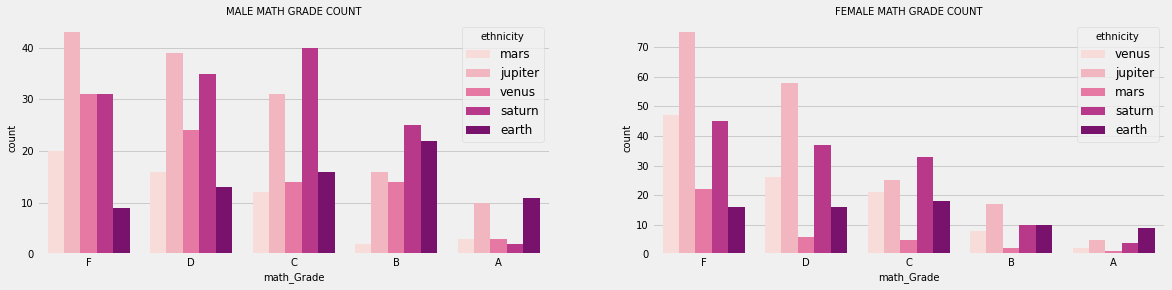

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(18,4), sharey=False)
i=0
for sex in ['male', 'female']:
  sns.countplot(x='math_Grade', hue='ethnicity', data=grade.loc[grade['gender']==sex,:], palette='RdPu', ax=axs[i], )
  axs[i].set_title(f"{sex.upper()} MATH GRADE COUNT")
  i+=1
# fig.legend(grade['ethnicity'].unique())
plt.show()

#### Using Catplot instead of countplot to Break down by Gender

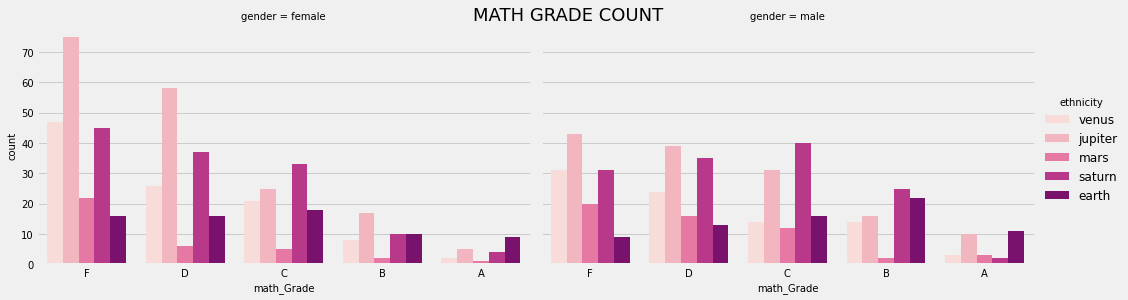

In [ ]:
rc={'axes.labelsize': 10, 'font.size': 10, 'legend.fontsize': 12.0, 'axes.titlesize': 10}
plt.rcParams.update(**rc)
sns.catplot(x='math_Grade', hue='ethnicity', col= 'gender', data=grade, kind='count', palette='RdPu', height=4, aspect=1.8)
plt.suptitle("MATH GRADE COUNT",fontsize=18)
plt.show()

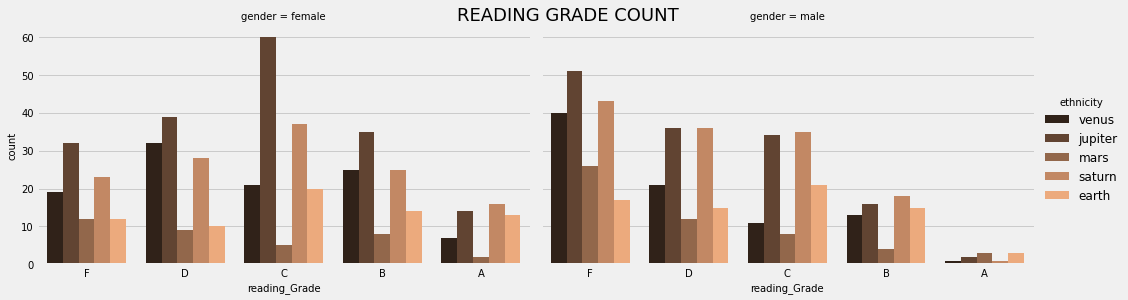

In [ ]:
rc={'axes.labelsize': 10, 'font.size': 10, 'legend.fontsize': 12.0, 'axes.titlesize': 10}
plt.rcParams.update(**rc)
sns.catplot(x='reading_Grade', hue='ethnicity', col= 'gender', data=grade, kind='count', palette='copper', height=4, aspect=1.8)
plt.suptitle("READING GRADE COUNT",fontsize=18)
plt.show()

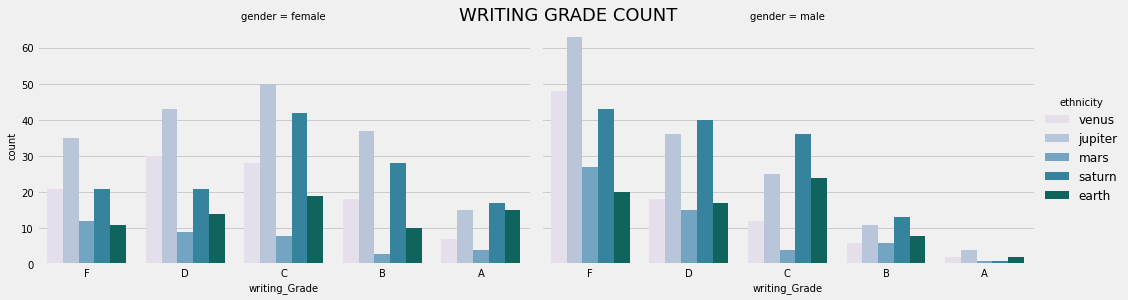

In [ ]:
rc={'axes.labelsize': 10, 'font.size': 10, 'legend.fontsize': 12.0, 'axes.titlesize': 10}
plt.rcParams.update(**rc)
sns.catplot(x='writing_Grade', hue='ethnicity', col= 'gender', data=grade, kind='count', palette='PuBuGn', height=4, aspect=1.8)
plt.suptitle("WRITING GRADE COUNT",fontsize=18)
plt.show()

In [ ]:
grade.loc[(grade['gender']=='male') & (grade['ethnicity']=='venus')&(grade['math_Grade']=='F')].shape[0]


31

#### Using Violin Plot to show Score Distribution

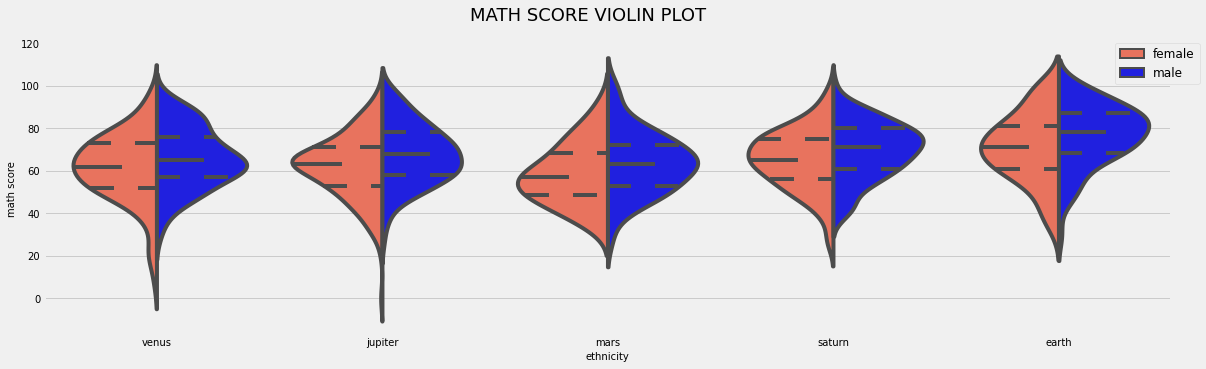

In [ ]:
plt.figure(figsize=(18,5))
sns.violinplot(x=grade['ethnicity'], y=grade['math score'], hue=grade['gender'], split=True, 
               inner='quartile', palette=['tomato', 'blue'])
plt.suptitle("MATH SCORE VIOLIN PLOT",fontsize=18)
plt.legend(bbox_to_anchor=(0.95, 1), loc=2, borderaxespad=0)
plt.show()

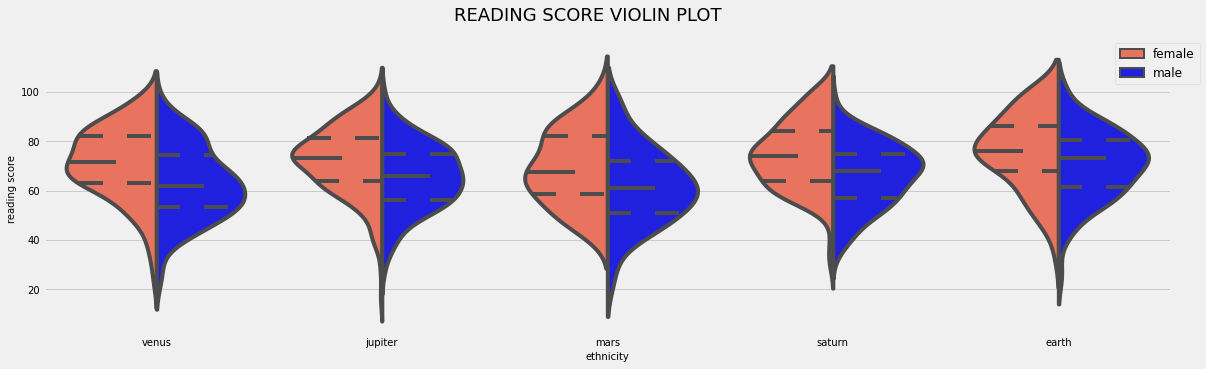

In [ ]:
plt.figure(figsize=(18,5))
sns.violinplot(x=grade['ethnicity'], y=grade['reading score'], hue=grade['gender'], split=True, 
               inner='quartile', palette=['tomato', 'blue'])
plt.suptitle("READING SCORE VIOLIN PLOT",fontsize=18)
plt.legend(bbox_to_anchor=(0.95, 1), loc=2, borderaxespad=0)
plt.show()

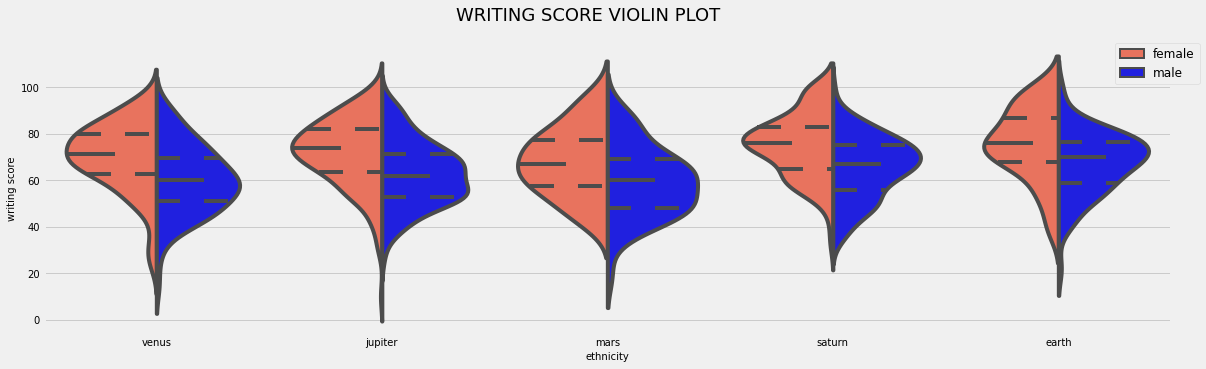

In [ ]:
plt.figure(figsize=(18,5))
sns.violinplot(x=grade['ethnicity'], y=grade['writing score'], hue=grade['gender'], split=True, 
               inner='quartile', palette=['tomato', 'blue'])
plt.suptitle("WRITING SCORE VIOLIN PLOT",fontsize=18)
plt.legend(bbox_to_anchor=(0.95, 1), loc=2, borderaxespad=0)
plt.show()

# Machine Learning Data Preparation

**1. Create a Target field for Fail (F) and Pass ( the rest)**

In [ ]:
print(f"The percentages of students who failed in math are:{round(100*(grade.loc[grade['math_Grade']=='F'].shape[0]/grade.shape[0]),2)}%\n")
print(f"The percentages of students who failed in reading are:{round(100*(grade.loc[grade['reading_Grade']=='F'].shape[0]/grade.shape[0]),2)}%\n")
print(f"The percentages of students who failed in wrtiing are:{round(100*(grade.loc[grade['writing_Grade']=='F'].shape[0]/grade.shape[0]),2)}%\n")
print(f"The percentages of students who failed all subjects are:{round(100*(grade.loc[(grade['math_Grade']=='F')&(grade['reading_Grade']=='F')&(grade['writing_Grade']=='F')].shape[0]/len(grade)),2)}%")

The percentages of students who failed in math are:33.8%

The percentages of students who failed in reading are:27.5%

The percentages of students who failed in wrtiing are:30.1%

The percentages of students who failed all subjects are:20.5%


In [ ]:
# Create a target column, if u want to drop it use grade.drop(['target'], axis=1, inplace=True)
grade['target'] = 0
grade.head()

,gender,ethnicity,parental_Education,lunch,test_Preparation,math score,reading score,writing score,math_Grade,reading_Grade,writing_Grade,target
0,female,venus,bachelor's degree,standard,none,72,72,74,C,C,C,0
1,female,jupiter,some college,standard,completed,69,90,88,D,B,B,0
2,female,venus,master's degree,standard,none,90,95,93,B,A,A,0
3,male,mars,associate's degree,free/reduced,none,47,57,44,F,F,F,0
4,male,jupiter,some college,standard,none,76,78,75,C,C,C,0


In [ ]:
print("ALL Fs:", grade.loc[(grade['math_Grade']=='F')&(grade['reading_Grade']=='F')&(grade['writing_Grade']=='F')].shape[0])
print("At least one Non F(Using python negation ~ symbol):",grade.loc[~(grade['math_Grade']=='F')|~(grade['reading_Grade']=='F')|~(grade['writing_Grade']=='F')].shape[0])
print('The total sums up to 1000')

ALL Fs: 206
At least one Non F(Using python negation ~ symbol): 794
The total sums up to 1000


In [ ]:
# one way of creating a value for the new target is: use the filter and the column under loc and change the value,
#otherwise use deepcopy or copy
# all Fs can also be computed as: pd.DataFrame(grade[cat_cols].value_counts(ascending=False)).reset_index().iloc[0,3]
grade.loc[(grade['math_Grade']=='F')&(grade['reading_Grade']=='F')&(grade['writing_Grade']=='F') , 'target']='Fail'

In [ ]:
grade.loc[~(grade['math_Grade']=='F')|~(grade['reading_Grade']=='F')|~(grade['writing_Grade']=='F') , 'target'] = 'Pass'

In [ ]:
grade.head()

,gender,ethnicity,parental_Education,lunch,test_Preparation,math score,reading score,writing score,math_Grade,reading_Grade,writing_Grade,target
0,female,venus,bachelor's degree,standard,none,72,72,74,C,C,C,Pass
1,female,jupiter,some college,standard,completed,69,90,88,D,B,B,Pass
2,female,venus,master's degree,standard,none,90,95,93,B,A,A,Pass
3,male,mars,associate's degree,free/reduced,none,47,57,44,F,F,F,Fail
4,male,jupiter,some college,standard,none,76,78,75,C,C,C,Pass


In [ ]:
#Verify if all the changes are made using unique method on target column
print("Only Failed students: ", grade.loc[(grade['math_Grade']=='F')&(grade['reading_Grade']=='F')&(grade['writing_Grade']=='F')]['target'].unique())
print("Only Pass students: ",grade.loc[~(grade['math_Grade']=='F')|~(grade['reading_Grade']=='F')|~(grade['writing_Grade']=='F')]['target'].unique())

Only Failed students:  ['Fail']
Only Pass students:  ['Pass']


In [ ]:
# A second way of creating a new column is using the where statement
np.where(grade['math_Grade'].str.contains('F'), 1, 0)[:10]

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 1])

**2. Categorize numerical and categorical features**

In [ ]:
grade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   gender              1000 non-null   object  
 1   ethnicity           1000 non-null   object  
 2   parental_Education  1000 non-null   object  
 3   lunch               1000 non-null   object  
 4   test_Preparation    1000 non-null   object  
 5   math score          1000 non-null   int64   
 6   reading score       1000 non-null   int64   
 7   writing score       1000 non-null   int64   
 8   math_Grade          999 non-null    category
 9   reading_Grade       1000 non-null   category
 10  writing_Grade       1000 non-null   category
 11  target              1000 non-null   object  
dtypes: category(3), int64(3), object(6)
memory usage: 74.0+ KB


In [ ]:
cat_cols = grade.select_dtypes(include='category').columns
obj_cols = grade.select_dtypes(include='object').columns
num_cols = grade.select_dtypes(include='int').columns
print(cat_cols, obj_cols, num_cols)

Index(['math_Grade', 'reading_Grade', 'writing_Grade'], dtype='object') Index(['gender', 'ethnicity', 'parental_Education', 'lunch',
       'test_Preparation', 'target'],
      dtype='object') Index(['math score', 'reading score', 'writing score'], dtype='object')


In [ ]:
# object columns with out the target column
obj_cols = grade[obj_cols].drop(['target'], axis=1).columns
obj_cols

Index(['gender', 'ethnicity', 'parental_Education', 'lunch',
       'test_Preparation'],
      dtype='object')

**3. Pipelining(Column Transforming(preprocessing(scaling, encoding)), classifying)**
* Pipline which is a function of Column Transformers and Modelling/classifiers,
* Column Transformers are a function of preprocessing
* Preprocessing is a function of encoding and scaling

Steps
* Nominal and Ordinal categories encoding
* Will use both train_test_split and Cross Validation
* Will use all features as well as select features which are better target predictors
* Will start with basic ML algorithms: Logistic Regression, Linear Regression
* Will run decision tree algorithms
* Will run SVM with all the kernels
* Run accuracy for all models and compare the result

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
# since the Grades are derived from the Scores we will drop them from X, we will use them as a target separately
grade[cat_cols].head(2)

,math_Grade,reading_Grade,writing_Grade
0,C,C,C
1,D,B,B


### Encoding: get dummies with Pandas

*   Encode categorical data using Pandas get_dummies
*   Concatenate the encoded data with the original data
*   Drop the categorical features
*   Assign the target variable and indepndent features with variables X and y
*   Use train test split model selection to set up the training and testing data sizes
*   Using the ML algorithm predict the target and compare with the true value

In [ ]:
# First create a list of all none numerical columns in one list
non_num_cols =  list(obj_cols.append(cat_cols))+['target']
non_num_cols

['gender',
 'ethnicity',
 'parental_Education',
 'lunch',
 'test_Preparation',
 'math_Grade',
 'reading_Grade',
 'writing_Grade',
 'target']

In [ ]:
# create dummy variables
print("columns by rows are==>", pd.get_dummies(grade[obj_cols.append(cat_cols)], drop_first=True).shape)
encoded_df = pd.get_dummies(grade[non_num_cols], drop_first=True)
encoded_df.head()

columns by rows are==> (1000, 24)


,gender_male,ethnicity_jupiter,ethnicity_mars,ethnicity_saturn,ethnicity_venus,parental_Education_bachelor's degree,parental_Education_high school,parental_Education_master's degree,parental_Education_some college,parental_Education_some high school,lunch_standard,test_Preparation_none,math_Grade_D,math_Grade_C,math_Grade_B,math_Grade_A,reading_Grade_D,reading_Grade_C,reading_Grade_B,reading_Grade_A,writing_Grade_D,writing_Grade_C,writing_Grade_B,writing_Grade_A,target_Pass
0,0,0,0,0,1,1,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,1,0,0,1
1,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,1
2,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1,1
3,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,1,0,0,0,1,0,0,1


In [ ]:
# create a combined table with encoded and original data
merged = pd.concat([grade, encoded_df], axis=1)
print("Rows per Columns/features==>", merged.shape)
merged.head(2)


Rows per Columns/features==> (1000, 37)


,gender,ethnicity,parental_Education,lunch,test_Preparation,math score,reading score,writing score,math_Grade,reading_Grade,writing_Grade,target,gender_male,ethnicity_jupiter,ethnicity_mars,ethnicity_saturn,ethnicity_venus,parental_Education_bachelor's degree,parental_Education_high school,parental_Education_master's degree,parental_Education_some college,parental_Education_some high school,lunch_standard,test_Preparation_none,math_Grade_D,math_Grade_C,math_Grade_B,math_Grade_A,reading_Grade_D,reading_Grade_C,reading_Grade_B,reading_Grade_A,writing_Grade_D,writing_Grade_C,writing_Grade_B,writing_Grade_A,target_Pass
0,female,venus,bachelor's degree,standard,none,72,72,74,C,C,C,Pass,0,0,0,0,1,1,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,1,0,0,1
1,female,jupiter,some college,standard,completed,69,90,88,D,B,B,Pass,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,1


In [ ]:
# non_num_cols.append(['math score', 'reading score', 'writing score']) with additional unecessary features
for lst in ['math score', 'reading score', 'writing score']:
  non_num_cols.append(lst)
non_num_cols

['gender',
 'ethnicity',
 'parental_Education',
 'lunch',
 'test_Preparation',
 'math_Grade',
 'reading_Grade',
 'writing_Grade',
 'target',
 'math score',
 'reading score',
 'writing score']

In [ ]:
# Drop duplicate categorical data and unnecessary features
mlReady_df = merged.drop(non_num_cols, axis='columns')
mlReady_df.head(2)

,gender_male,ethnicity_jupiter,ethnicity_mars,ethnicity_saturn,ethnicity_venus,parental_Education_bachelor's degree,parental_Education_high school,parental_Education_master's degree,parental_Education_some college,parental_Education_some high school,lunch_standard,test_Preparation_none,math_Grade_D,math_Grade_C,math_Grade_B,math_Grade_A,reading_Grade_D,reading_Grade_C,reading_Grade_B,reading_Grade_A,writing_Grade_D,writing_Grade_C,writing_Grade_B,writing_Grade_A,target_Pass
0,0,0,0,0,1,1,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,1,0,0,1
1,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,1


## ML Prediction

In [ ]:
# target and all other features including scores and grades
X = mlReady_df.drop(['target_Pass'], axis=1)
y = mlReady_df['target_Pass']

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [ ]:
logreg = LogisticRegression()

In [ ]:
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = logreg.predict(X_test)

In [ ]:
print(f"The accuracy score with Logistic Regression is: {100*accuracy_score(y_test, y_pred)}%")

The accuracy score with Logistic Regression is: 100.0%


##### The above resulted in overfitting, will drop the grade and scores features will run again.

In [ ]:
mlReady_df.columns

Index(['gender_male', 'ethnicity_jupiter', 'ethnicity_mars',
       'ethnicity_saturn', 'ethnicity_venus',
       'parental_Education_bachelor's degree',
       'parental_Education_high school', 'parental_Education_master's degree',
       'parental_Education_some college',
       'parental_Education_some high school', 'lunch_standard',
       'test_Preparation_none', 'math_Grade_D', 'math_Grade_C', 'math_Grade_B',
       'math_Grade_A', 'reading_Grade_D', 'reading_Grade_C', 'reading_Grade_B',
       'reading_Grade_A', 'writing_Grade_D', 'writing_Grade_C',
       'writing_Grade_B', 'writing_Grade_A', 'target_Pass'],
      dtype='object')

In [ ]:
# target and all other features including scores and grades, define only X, y is already defined
# X =  mlReady_df.drop(['target_Pass'], axis=1)
X = mlReady_df.drop(['math_Grade_D', 'math_Grade_C', 'math_Grade_B',
       'math_Grade_A', 'reading_Grade_D', 'reading_Grade_C', 'reading_Grade_B',
       'reading_Grade_A', 'writing_Grade_D', 'writing_Grade_C',
       'writing_Grade_B', 'writing_Grade_A', 'target_Pass'], axis=1)
X.head(2)

,gender_male,ethnicity_jupiter,ethnicity_mars,ethnicity_saturn,ethnicity_venus,parental_Education_bachelor's degree,parental_Education_high school,parental_Education_master's degree,parental_Education_some college,parental_Education_some high school,lunch_standard,test_Preparation_none
0,0,0,0,0,1,1,0,0,0,0,1,1
1,0,1,0,0,0,0,0,0,1,0,1,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [ ]:
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(f"The accuracy score with Logistic Regression is: {100*accuracy_score(y_test, y_pred)}%")

The accuracy score with Logistic Regression is: 78.4%


#### Support Vector Machine

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc_kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for kernel in svc_kernels:
    clf = SVC(kernel=kernel)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"The accuracy score for svm {kernel} kernel is: {100*accuracy_score(y_test, y_pred)}%")

The accuracy score for svm linear kernel is: 80.4%
The accuracy score for svm poly kernel is: 77.60000000000001%
The accuracy score for svm rbf kernel is: 79.2%
The accuracy score for svm sigmoid kernel is: 70.0%


In [ ]:
from sklearn.preprocessing MinMaxScaler, StandardScaler

##### **Using Pipeline(Column_Transformers(scaling and encoding))**

In [ ]:
# since encoding and modelling is done through the pipeline, we need to get back to the original unenconded data
X = grade[['gender', 'ethnicity', 'parental_Education', 'lunch', 'test_Preparation', 'math score', 'reading score', 'writing score']]
y = grade['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [ ]:
from sklearn.preprocessing import StandardScaler
ohe = OneHotEncoder()

In [ ]:
# ct step1 scaling numerical columns, step2 encoding categorical columns
ct = ColumnTransformer(transformers=[
                                    ('step1', StandardScaler(), num_cols),
                                    ('step2', ohe, obj_cols)
], remainder='passthrough')
ct

ColumnTransformer(n_jobs=None, remainder='passthrough', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('step1',
                                 StandardScaler(copy=True, with_mean=True,
                                                with_std=True),
                                 Index(['math score', 'reading score', 'writing score'], dtype='object')),
                                ('step2',
                                 OneHotEncoder(categories='auto', drop=None,
                                               dtype=<class 'numpy.float64'>,
                                               handle_unknown='error',
                                               sparse=True),
                                 Index(['gender', 'ethnicity', 'parental_Education', 'lunch',
       'test_Preparation'],
      dtype='object'))],
                  verbose=False)

#### **Linear Regression**

In [ ]:
myPipe = Pipeline(steps=[
                ('ct', ct),
                ('clf', LogisticRegression())
])
myPipe

Pipeline(memory=None,
         steps=[('ct',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('step1',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True),
                                                  Index(['math score', 'reading score', 'writing score'], dtype='object')),
                                                 ('step2',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.f...
                                     

In [ ]:
myPipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ct',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('step1',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True),
                                                  Index(['math score', 'reading score', 'writing score'], dtype='object')),
                                                 ('step2',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.f...
                                     

In [ ]:
#get the encoded features
myPipe.named_steps['ct'].transformers_[1][1].get_feature_names()

array(['x0_female', 'x0_male', 'x1_earth', 'x1_jupiter', 'x1_mars',
       'x1_saturn', 'x1_venus', "x2_associate's degree",
       "x2_bachelor's degree", 'x2_high school', "x2_master's degree",
       'x2_some college', 'x2_some high school', 'x3_free/reduced',
       'x3_standard', 'x4_completed', 'x4_none'], dtype=object)

In [ ]:
y_pred = myPipe.predict(X_test)
y_pred[:20]

array(['Pass', 'Pass', 'Pass', 'Pass', 'Pass', 'Pass', 'Pass', 'Pass',
       'Fail', 'Pass', 'Pass', 'Fail', 'Pass', 'Pass', 'Pass', 'Pass',
       'Pass', 'Pass', 'Pass', 'Pass'], dtype=object)

In [ ]:
print(f"The accuracy score based on Linear Regression model is: {100*accuracy_score(y_test, y_pred)}%")

The accuracy score based on Linear Regression model is: 97.2%


##### Running a number of Iterations to get a better accuracy

In [ ]:
# Don't use while loop, it takes too long
accuracy_list = [] 
for i in range(10):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=i)
  myPipe = Pipeline(steps=[
                ('ct', ct),
                ('clf', LogisticRegression())
  ])
  myPipe.fit(X_train, y_train)
  y_pred = myPipe.predict(X_test)
  accuracy_list.append(accuracy_score(y_test, y_pred))
print(accuracy_list)

[0.944, 0.964, 0.972, 0.936, 0.956, 0.944, 0.948, 0.964, 0.952, 0.96]


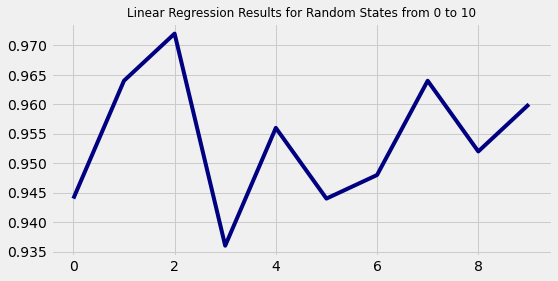

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(accuracy_list, color='navy')
plt.title("Linear Regression Results for Random States from 0 to 10", fontsize=12)
plt.show()

In [ ]:
#use Support Vector Machine for classifier
svc_kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for kernel in svc_kernels:
    myPipe = Pipeline(steps=[
                    ('ct', ct),
                    ('clf', SVC(kernel=kernel))
    ])
    myPipe.fit(X_train, y_train)
    y_pred = myPipe.predict(X_test)
    print(f"The accuracy score for svm.SVC {kernel} kernel is: {100*accuracy_score(y_test, y_pred)}%")

The accuracy score for svm.SVC linear kernel is: 96.8%
The accuracy score for svm.SVC poly kernel is: 95.6%
The accuracy score for svm.SVC rbf kernel is: 96.8%
The accuracy score for svm.SVC sigmoid kernel is: 93.2%


### Use less features with SVM: exclude 'score' features

In [ ]:
X = grade[['gender', 'ethnicity', 'parental_Education', 'lunch', 'test_Preparation']]
y = grade['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

ct = ColumnTransformer(transformers=[
                                    
                                    ('step2', ohe, obj_cols)
], remainder='passthrough') # no numerical column so that step has been removed

svc_kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for kernel in svc_kernels:
    myPipe = Pipeline(steps=[
                    ('ct', ct),
                    ('clf', SVC(kernel=kernel))
    ])
    myPipe.fit(X_train, y_train)
    y_pred = myPipe.predict(X_test)
    print(f"The accuracy score for svm.SVC {kernel} kernel is: {100*accuracy_score(y_test, y_pred)}%")

The accuracy score for svm.SVC linear kernel is: 80.4%
The accuracy score for svm.SVC poly kernel is: 77.2%
The accuracy score for svm.SVC rbf kernel is: 78.4%
The accuracy score for svm.SVC sigmoid kernel is: 70.8%


#### **Conclusion**


* Overall in Reading and Writing female students score better than male students, while in math the reverse is true.
* Students in Jupiter have the largest F students, while earth people 
have largest outstanding achievers
More Male students failed in all planets but Earth.
*  In math Jupiter students failed more than anyone else, out of those more female than male failed it.
*   Earth students scored the highest number of As, with males getting more than females.
*   By far Earth students are high acheivers than anyone else, with Earth females getting the highest numbers of straight A Scores.
*   Students in Jupiter have the largest Fail students, while Saturn people have the largest outstanding acheivers in reading
* Students in Jupiter have the largest Fail students and the largest outstanding acheivers in writing.
* When the scores or the grades are included the algorithms output a high accuracy of more than 96%. It seems the algorithm recognises the formula used and applied it to the test data.
* But when the scores and grade features are excluded and ML techinque is applied the accuracy result hovers around 80%. In fact the highest score acheived is with svm.SVC(kernel='linear') providing a 80% accuracy.